In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

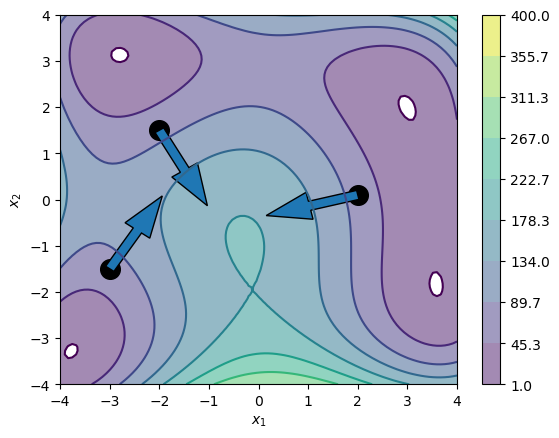

In [4]:
def f(x1,x2):
    t1 = (x1**2+x2-11.0)**2
    t2 = (x1+x2**2-7.0)**2
    return t1+t2

vals = np.linspace(-4.0,4.0,100)
x1d, x2d = np.meshgrid(vals,vals)

yd = f(x1d, x2d)

fig, ax = plt.subplots()
levels = np.linspace(1.0,400, 10)
ax.contour(x1d, x2d, yd, levels=levels)
color_map = ax.contourf(x1d, x2d, yd, levels=levels, alpha=0.5)
fig.colorbar(color_map, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')

for P0 in [[-2,1.5],[2,.1],[-3,-1.5]]:
    P0 = torch.tensor(P0, requires_grad=True)
    #print(P0[0])
    forw = f(P0[0], P0[1])
    forw.backward()
    grad_of_y = P0.grad
    P0 = P0.detach()
    v = grad_of_y/np.linalg.norm(grad_of_y)
    ax.scatter(*P0,s=200,c='k')
    ax.arrow(*P0,*v,width=0.2)